# Swallow neural networks

### 2017010055 박현일

In [51]:
import numpy as np
from matplotlib import pyplot as plt

In [277]:
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=np.float64)
y_seeds = np.array([0,1,1,0])

In [278]:
N = 1000
idxs = np.random.randint(0,4,N)

In [279]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [280]:
X += np.random.normal(scale = 0.25, size = X.shape)

In [281]:
idxs_1 = np.where(Y == 1)
idxs_0 = np.where(Y == 0)

In [282]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [283]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

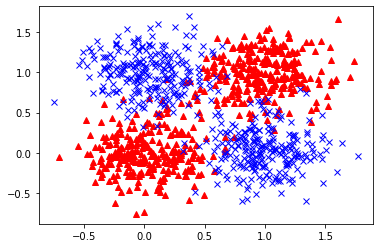

In [284]:
plt.plot(X_0[:, 0], X_0[:, 1], "r^")
plt.plot(X_1[:, 0], X_1[:, 1], "bx")
plt.show()

In [285]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=num_hiddens)
        self.W2 = np.random.normal(size=num_hiddens)
        self.b2 = np.random.normal(size=1)
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        
        return a2, (z1, a1, z2, a2)

In [304]:
model = shallow_neural_network(2, 3)

In [305]:
def train(X, Y, model, lr=0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    
    cost = 0.0
    
    for x, y in zip(X, Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
            
        diff = a2-y
        
        db2 += diff
        
        #for i in range(model.num_hiddens):
        #    dW2[i] += a1[i]*diff
        dW2 += a1*diff
            
        #for i in range(model.num_hiddens):
        #    db1[i] += (1-a1[i]**2)*model.W2[i]*diff
        db1 += (1-a1**2)*model.W2*diff
            
        #for i in range(model.num_hiddens):
        #    for j in range(model.num_input_features):
        #        dW1[i,j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff
        dW1 += np.outer(x, (1-a1**2)*model.W2*diff).T
                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
    
    return cost

In [307]:
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch%10 == 0:
        print(epoch, cost)

0 [0.70577315]
10 [0.68634607]
20 [0.67255153]
30 [0.63927949]
40 [0.58035322]
50 [0.50978504]
60 [0.44864856]
70 [0.40426057]
80 [0.37439698]
90 [0.35469361]


In [312]:
print(model.predict((1,1))[0].item())
print(model.predict((1,0))[0].item())
print(model.predict((0,1))[0].item())
print(model.predict((0,0))[0].item())

0.09654599868346721
0.8305469780858583
0.8535266138864402
0.09703222351725922
